# reduce the number of features :

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, 
resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [38]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [40]:
from sklearn.decomposition import PCA

### 1: Reading dataset


In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

In [3]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [77]:
numrows=25549
weather=pd.DataFrame({'yesterday':[0.0]*numrows,
                             'today':[0.0]*numrows,
                             'tomorrow':[0.0]*numrows,
                            })

seq = ['yesterday','today','tomorrow']

weather=weather.reindex(columns=seq)

for z in range(numrows):
    i = z + 2
    yesterday = data.iloc[(i-2),1]
    today = data.iloc[(i-1),1]
    tomorrow = data.iloc[i,1]
   
    
    weather.iat[z,0] = yesterday
    weather.iat[z,1] = today
    weather.iat[z,2] = tomorrow
 
    
       
    
weather.head()

,yesterday,today,tomorrow
0,0.47,0.59,0.42
1,0.59,0.42,0.31
2,0.42,0.31,0.17
3,0.31,0.17,0.44
4,0.17,0.44,0.41


In [79]:
weather=weather[~weather.isin([np.nan, np.inf, -np.inf]).any(1)] 

In [90]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(weather)

StandardScaler()

In [92]:
Scaled_weather=scaler.transform(weather)
Scaled_weather

array([[ 1.52166692,  2.0238163 ,  1.31283328],
       [ 2.0236554 ,  1.31263646,  0.85262297],
       [ 1.31250505,  0.85246127,  0.26690075],
       ...,
       [-0.44445464, -0.44439609, -0.44433337],
       [-0.44445464, -0.44439609, -0.44433337],
       [-0.44445464, -0.44439609, -0.44433337]])

### 2: Dimensionality reduction transform:

In [96]:
pca = PCA(n_components=2)
pca.fit(Scaled_weather)
weather_pca = pca.transform(Scaled_weather)
print("original shape:   ", Scaled_weather.shape)
print("transformed shape:", weather_pca.shape)

original shape:    (25542, 3)
transformed shape: (25542, 2)


In [94]:
weather_pca

array([[ 6.77803919e-01, -3.51796543e-02],
       [ 5.74356744e-01, -1.97845284e-01],
       [ 3.35569472e-01, -1.76678147e-01],
       ...,
       [-1.83403556e-01, -8.01137462e-06],
       [-1.83403556e-01, -8.01137462e-06],
       [-1.83403556e-01, -8.01137462e-06]])

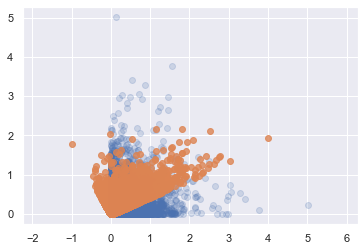

In [95]:
weather_new = pca.inverse_transform(weather_pca)
plt.scatter(weather['yesterday'], weather['today'], alpha=0.2)
plt.scatter(weather_new[:, 0], weather_new[:, 1], alpha=0.8)
plt.axis('equal');